<h1>Univariate Linear Regression and Gradient Descent Implementation </h1>

Hi, there I am Saumya and in this notebook we I have implemented Linear Regresssion and Gradient Descent from scratch and have given explaination of every step and line . <br>
<b>I hope you have a great time going through it !! ✔️</b>

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We imported all the required libraries needed to implement the algorithms .

In [214]:
data=pd.read_csv("ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Here we used pandas to read our text file and used the 'head' function to see the first 5 entries of our data .SO, everythings okay ,let's proceed .

Text(0.5, 1.0, 'Profit-Population Plot ')

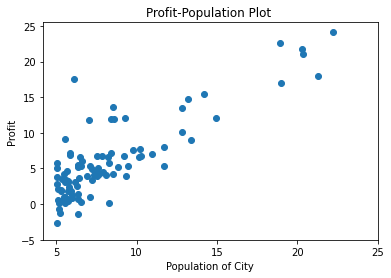

In [215]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City")
plt.ylabel("Profit")
plt.title("Profit-Population Plot ")

1st Line : This sees the data and plots just the blue dots that you see in a scattering format as the name suggests .

2nd & 3rd Line : These two lines make lines and markings of the graph 
                 Syntax : np.arrange(starting mark , max ending mark, interval)
                 
4th & 5th & 6th Line : Just label the graph.                 

In [216]:
def CostFunction(X,y,theta):
    m= len(y)
    J= 1/(2*m)*np.sum((X.dot(theta)-y)**2)        
    return J

This is the function that input array(X) and output array(y) and               parameter theta and then computes the Cost Function Formula that we had         learnt in my [ML WEEK 1 BLOG](https://www.thecsengineer.com/2020/12/learning-machine-learning-course-week-1-andrewng.html). 
       

In [217]:
data_arr=data.values
m=len(data_arr[:,-1])
X= np.append(np.ones((m,1)),data_arr[:,0].reshape(m,1),axis=1)
y= data_arr[:,1].reshape(m,1)
theta= np.zeros((2,1))
CostFunction(X,y,theta)

32.072733877455676


Line 1 : We extract the data into a dataframe , think it just as a table which          hold a copy of our data .

Line 2 : We get the number of training examples i,e the no. of rows .

Line 3 : Here we store the inputs in a separate array i.e X and also we add              a additional row of 1s in the front row .

Line 4 : Here we store the outputs in a separate array i.e y .

Line 5 : Here we create the theta array which is just 2x1 matrix of zeroes.


Until now we have implemented Linear Regression but not an optimized one, so now we will use Gradient Descent to get an minimized and thus optimal value of theta  . Lets do it !!

In [218]:

def GradientDescent(X, y, theta, learningRate , iterations):
    m= len(y)
    J_list =[]
    for i in range(iterations):
        theta = theta - (learningRate*(1/m)*(X.transpose().dot(X.dot(theta)-y)))
        J_list.append(CostFunction(X,y,theta))
    return theta,J_list    
    
    


Here we implement the formula of Gradient Descent that I had explained in the [BLOG](https://www.thecsengineer.com/2020/12/learning-machine-learning-course-week-1-andrewng.html) so the funtions takes X, y , theta , Learning rate and the number of iterations as the parameter . <br>

Inside we maintain a list of all the cost functions according to the varying theta in every iterations for visualising the descent later .

In [219]:
theta,J_list = GradientDescent(X,y,theta,0.01,1500)
print(theta)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
 

[[-3.63029144]
 [ 1.16636235]]
h(x) =-3.63 + 1.17x1



Here we just call the functiona with th appropriate values like learning rate   = 0.01 and number of iterations = 1500 we get back the global minimum theta .
 

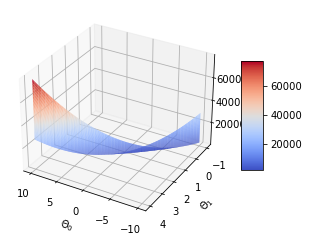

In [220]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]= CostFunction(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(b\Theta)$")
#rotate for better angle
ax.view_init(30,120)

This is just the 3D representation of Gradient Descent 
and this type of structure is called a Convex one.

Text(0.5, 1.0, 'Cost function using Gradient Descent')

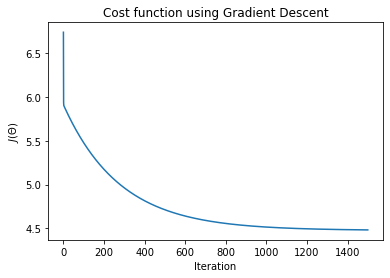

In [221]:
plt.plot(J_list)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Here in this graph we see how the cost function varies with each
iteration .

Text(0.5, 1.0, 'Profit-Population')

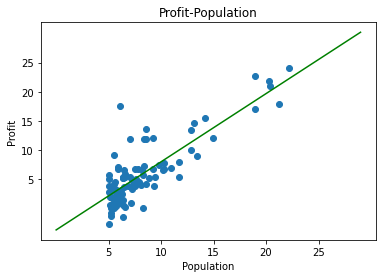

In [222]:
plt.scatter(data[0],data[1]) 
x_values=[x for x in range(30)] 
y_values= [theta[0]+x*theta[1] for x in x_values]
plt.plot(x_values, y_values,color="g")
plt.xticks(np.arange(5,30, step=5))
plt.yticks(np.arange(5,30 ,step = 5))
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Profit-Population")

Line 2 : x_values is a list where we store all numbers from 0 to 29.<br>
LIne 3 : y_values is a list where we store the values of hypothesis function            according to each element x_values .<br>
Line 4 : Here we just pass in both list and the plot function plots the green            straight line which fits the data very well that means our predictions          will be great.<br>
Let's Predict something !!

In [225]:
def Predict(x, theta ):
    prediction = theta.transpose().dot(x)
    return prediction[0]

In [228]:
predict = Predict(np.array([1,8.0]),theta)*1000
print("We predict that for the population of size 80,000 there will be a profit of "+str(round(predict,0)))

We predict that for the population of size 80,000 there will be a profit of 5701.0


<b>Thank You , I hope you had a good time learning and if found it helpful I would love a Github Star 🌟  🧡</b>